In [1]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import hashlib

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to the directory where JSON files ae
post_dir = Path('./test_archive_openrndr/posts')
data = []

# iterate through all JSON files in the directory
for json_file in post_dir.glob('**/*.json'):
    with open(json_file, 'r') as f:
        post_data = json.load(f)
        data.append(post_data)

df = pd.DataFrame(data)

In [3]:
# dropping (possible) irrelevant columns
df = df.drop(['name', 'username', 'avatar_template', 
              'yours', 'topic_html_title', 'display_username', 
              'flair_name', 'flair_url', 'flair_bg_color', 
              'flair_color', 'flair_group_id',
              'can_edit', 'can_delete', 'can_recover',
              'can_see_hidden_post', 'can_wiki',
              'bookmarked', 'moderator', 'admin',
              'staff', 'hidden', 'user_deleted',
              'edit_reason', 'can_view_edit_history',
              'wiki', 'current_user_reaction',
              'current_user_used_main_reaction',
              'via_email', 'primary_group_name',
              'can_accept_answer', 'can_unaccept_answer'], axis=1)

In [4]:
def pseudonymize_user(user_id):
    return hashlib.sha256(str(user_id).encode()).hexdigest()[:10]
# take first 10 characters 

df['user_id_pseudo'] = df['user_id'].apply(pseudonymize_user)
df['reply_to_user_pseudo'] = df['reply_to_user'].apply(pseudonymize_user)

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at']) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     1255 non-null   int64              
 1   created_at             1255 non-null   datetime64[ns, UTC]
 2   cooked                 1255 non-null   object             
 3   post_number            1255 non-null   int64              
 4   post_type              1255 non-null   int64              
 5   updated_at             1255 non-null   datetime64[ns, UTC]
 6   reply_count            1255 non-null   int64              
 7   reply_to_post_number   507 non-null    float64            
 8   quote_count            1255 non-null   int64              
 9   incoming_link_count    1255 non-null   int64              
 10  reads                  1255 non-null   int64              
 11  readers_count          1255 non-null   int64            

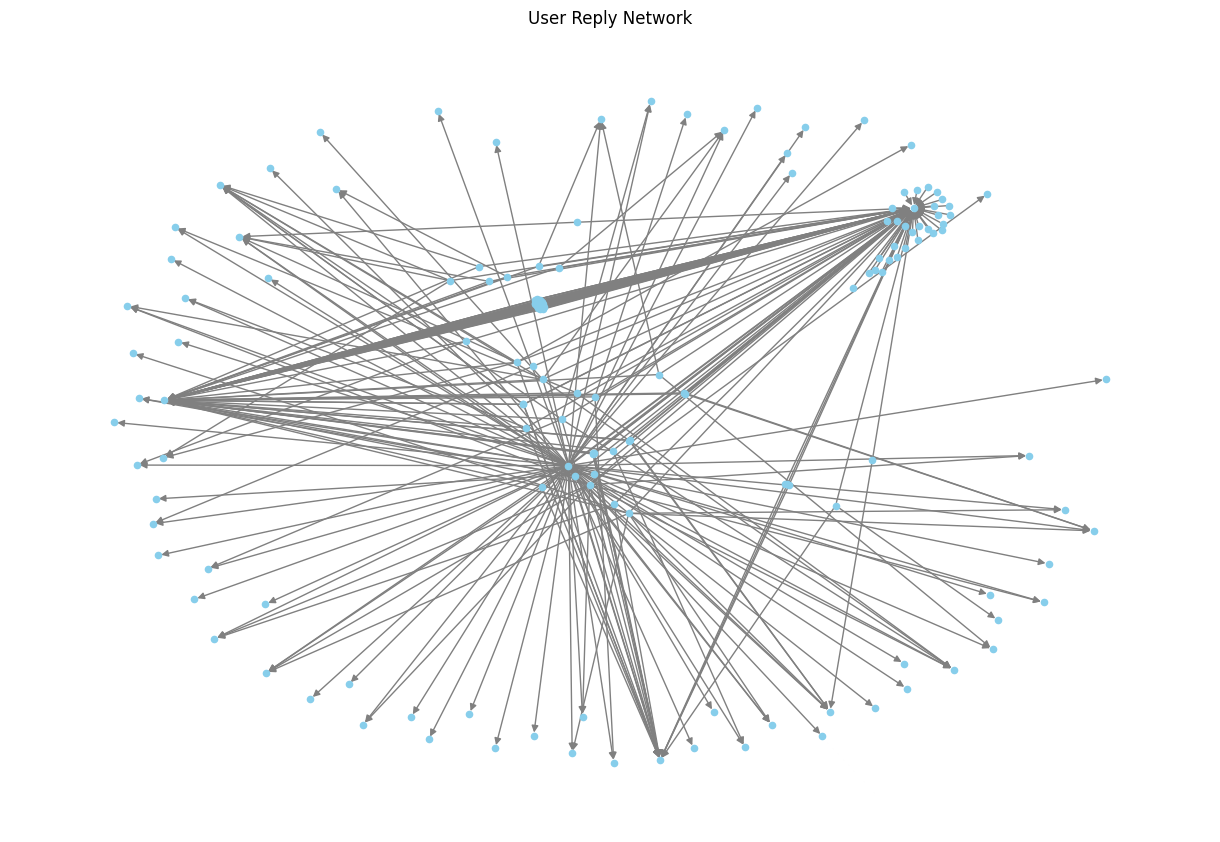

In [7]:
# create a directed graph
G = nx.DiGraph()

# add edges from user_id_pseudo to reply_to_user_pseudo
for index, row in df.iterrows():
    if pd.notnull(row['reply_to_user_pseudo']):
        G.add_edge(row['user_id_pseudo'], row['reply_to_user_pseudo'])

# plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42) # position the nodes using spring layout
nx.draw(G, pos, with_labels=False, node_size=20, node_color='skyblue', edge_color='gray', font_size=6)
plt.title('User Reply Network')
plt.show()

In [8]:
# analyzing the network
# degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality

# count of how many connections (edge) a node has

{'1bad6b8cf9': 0.00625,
 '9b2d5b4678': 0.56875,
 '4b227777d4': 0.043750000000000004,
 'd4735e3a26': 0.08125,
 'ef2d127de3': 0.018750000000000003,
 '764b62fb49': 0.05,
 'f9bcd6bfa8': 0.03125,
 'e7f6c01177': 0.3875,
 '1d6cec11a4': 0.325,
 '2c624232cd': 0.018750000000000003,
 'cd1ef425a1': 0.00625,
 '19581e27de': 0.018750000000000003,
 '4fc82b26ae': 0.05,
 'c09aaeca03': 0.00625,
 '2dc6bb97ec': 0.1125,
 '4523540f15': 0.00625,
 'b17ef6d19c': 0.0125,
 '262f4f5b80': 0.00625,
 '4ec9599fc2': 0.018750000000000003,
 'd004d7fd55': 0.00625,
 '50152fade0': 0.0125,
 '6f4b661212': 0.043750000000000004,
 '762150ad26': 0.037500000000000006,
 '785f3ec7eb': 0.0125,
 '4a44dc1536': 0.0125,
 'c418bfb096': 0.00625,
 '6efe781b5c': 0.00625,
 '670671cd97': 0.018750000000000003,
 '47cdac0ade': 0.018750000000000003,
 '7902699be4': 0.025,
 '59e19706d5': 0.018750000000000003,
 '7c74a6a155': 0.00625,
 'd6ada4e7e3': 0.0125,
 'd59eced1de': 0.0125,
 '85f2c592b1': 0.00625,
 '3d914f9348': 0.025,
 '0388e03473': 0.018750000

In [9]:
# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

# how often a node appears on the shortest paths between other nodes
# captures the extent to which a node serves as a brige in the network
# high betweenness centrality = often connects different groups of users

{'1bad6b8cf9': 0.0,
 '9b2d5b4678': 0.0,
 '4b227777d4': 0.0,
 'd4735e3a26': 0.0,
 'ef2d127de3': 0.0,
 '764b62fb49': 0.0,
 'f9bcd6bfa8': 0.0,
 'e7f6c01177': 0.0,
 '1d6cec11a4': 0.0,
 '2c624232cd': 0.0,
 'cd1ef425a1': 0.0,
 '19581e27de': 0.0,
 '4fc82b26ae': 0.0,
 'c09aaeca03': 0.0,
 '2dc6bb97ec': 0.0,
 '4523540f15': 0.0,
 'b17ef6d19c': 0.0,
 '262f4f5b80': 0.0,
 '4ec9599fc2': 0.0,
 'd004d7fd55': 0.0,
 '50152fade0': 0.0,
 '6f4b661212': 0.0,
 '762150ad26': 0.0,
 '785f3ec7eb': 0.0,
 '4a44dc1536': 0.0,
 'c418bfb096': 0.0,
 '6efe781b5c': 0.0,
 '670671cd97': 0.0,
 '47cdac0ade': 0.0,
 '7902699be4': 0.0,
 '59e19706d5': 0.0,
 '7c74a6a155': 0.0,
 'd6ada4e7e3': 0.0,
 'd59eced1de': 0.0,
 '85f2c592b1': 0.0,
 '3d914f9348': 0.0,
 '0388e03473': 0.0,
 '811786ad1a': 0.0,
 'ad82de24f3': 0.0,
 '98010bd927': 0.0,
 '31489056e0': 0.0,
 '8faec9aaf7': 0.0,
 '1a6562590e': 0.0,
 '0db33a1e29': 0.0,
 '031b4af519': 0.0,
 '2858dcd105': 0.0,
 'e4df4a6e22': 0.0,
 '41cfc0d1f2': 0.0,
 '671d51be12': 0.0,
 '2fca346db6': 0.0,


In [10]:
# closeness centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

# how close a node is to all other nodes in the network, based on the length of the shortest paths
# reflects the ease with which a node can reach others

{'1bad6b8cf9': 0.0,
 '9b2d5b4678': 0.56875,
 '4b227777d4': 0.0,
 'd4735e3a26': 0.0,
 'ef2d127de3': 0.0,
 '764b62fb49': 0.05,
 'f9bcd6bfa8': 0.03125,
 'e7f6c01177': 0.0,
 '1d6cec11a4': 0.325,
 '2c624232cd': 0.0,
 'cd1ef425a1': 0.00625,
 '19581e27de': 0.0,
 '4fc82b26ae': 0.0,
 'c09aaeca03': 0.00625,
 '2dc6bb97ec': 0.1125,
 '4523540f15': 0.0,
 'b17ef6d19c': 0.0,
 '262f4f5b80': 0.00625,
 '4ec9599fc2': 0.0,
 'd004d7fd55': 0.00625,
 '50152fade0': 0.0125,
 '6f4b661212': 0.0,
 '762150ad26': 0.0375,
 '785f3ec7eb': 0.0,
 '4a44dc1536': 0.0,
 'c418bfb096': 0.00625,
 '6efe781b5c': 0.00625,
 '670671cd97': 0.0,
 '47cdac0ade': 0.01875,
 '7902699be4': 0.0,
 '59e19706d5': 0.0,
 '7c74a6a155': 0.00625,
 'd6ada4e7e3': 0.0125,
 'd59eced1de': 0.0,
 '85f2c592b1': 0.00625,
 '3d914f9348': 0.0,
 '0388e03473': 0.01875,
 '811786ad1a': 0.0,
 'ad82de24f3': 0.00625,
 '98010bd927': 0.0,
 '31489056e0': 0.0,
 '8faec9aaf7': 0.00625,
 '1a6562590e': 0.0,
 '0db33a1e29': 0.00625,
 '031b4af519': 0.0,
 '2858dcd105': 0.0,
 'e4d

**degree centrality** tells you who is the most active or popular in terms of direct interactions

**betweenness centrality** reveals users who act as bridges between different parts of the network

**closeness centrality** identifies users who can quickly interact with the rest of the network

In [11]:
centrality_df = pd.DataFrame({
    'user_id_pseudo': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values())
})

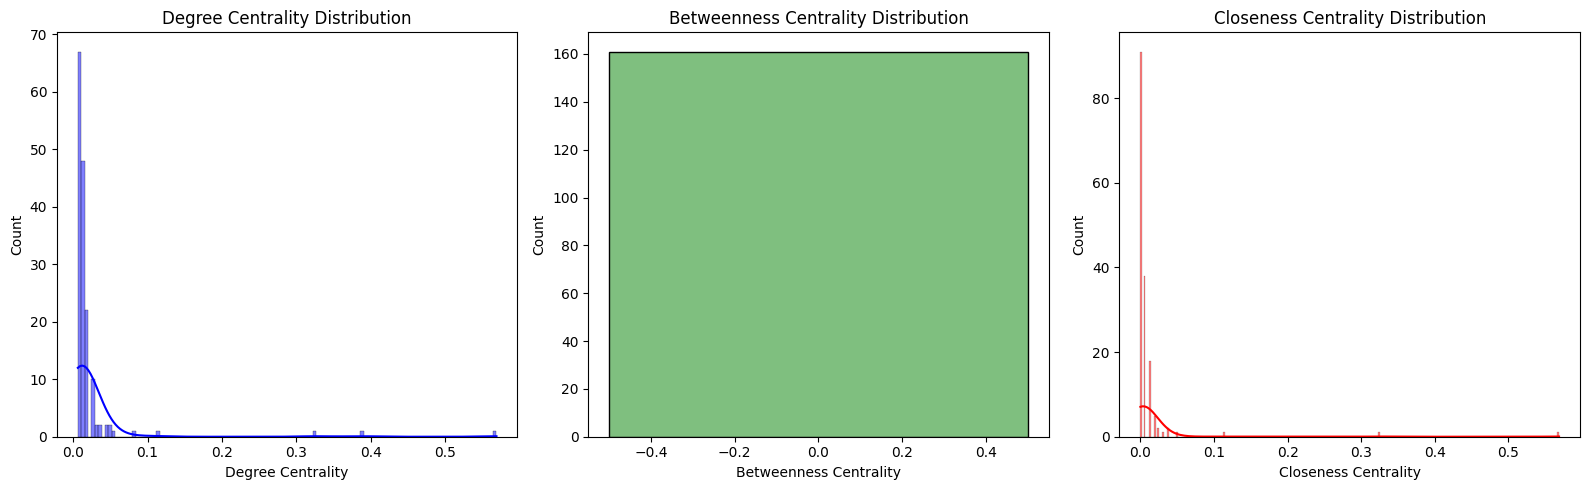

In [12]:
plt.figure(figsize=(16, 5))

# Degree Centrality
plt.subplot(1, 3, 1)
sns.histplot(centrality_df['degree_centrality'], kde=True, color='blue')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')

# Betweenness Centrality
plt.subplot(1, 3, 2)
sns.histplot(centrality_df['betweenness_centrality'], kde=True, color='green')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')

# Closeness Centrality
plt.subplot(1, 3, 3)
sns.histplot(centrality_df['closeness_centrality'], kde=True, color='red')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')

plt.tight_layout()
plt.show()

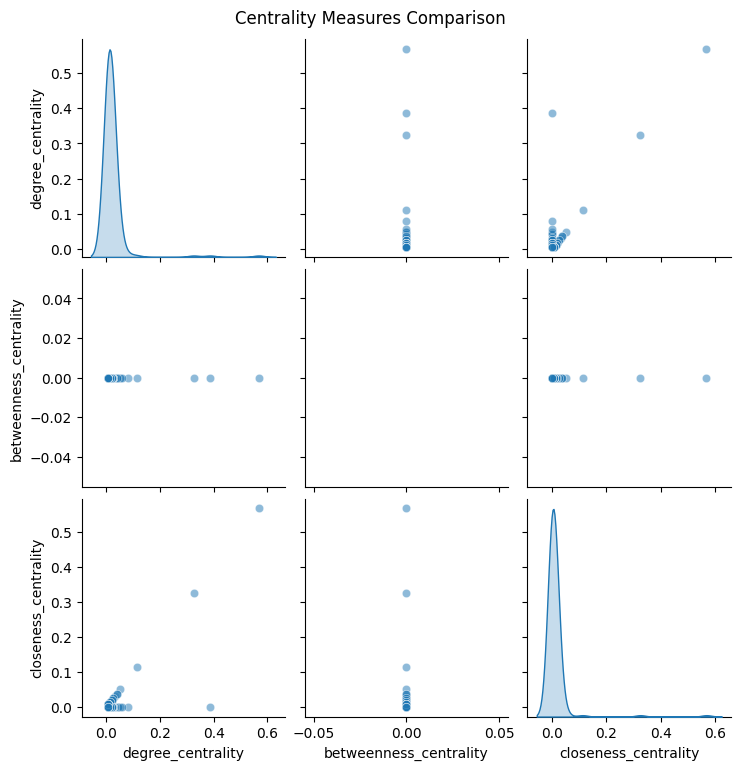

In [13]:
sns.pairplot(centrality_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Centrality Measures Comparison", y=1.02)
plt.show()

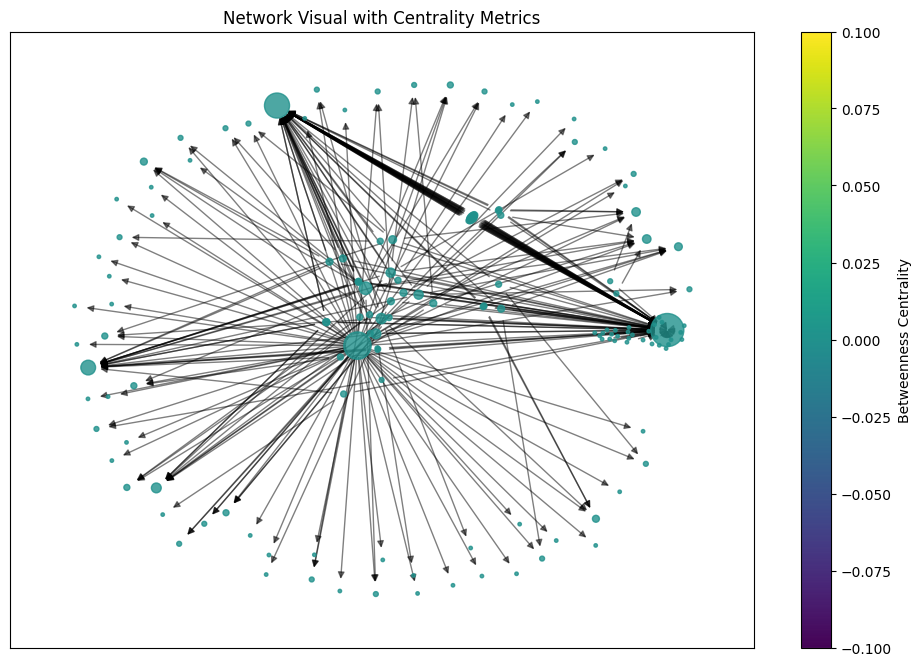

In [17]:
# Assuming you already have your graph G and centrality metrics calculated
node_size = [v * 1000 for v in degree_centrality.values()]
node_color = [betweenness_centrality[v] for v in G.nodes()]

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(figsize=(12, 8))  # Create a single subplot

# Draw the network
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.viridis, alpha=0.8, ax=ax)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

# Create a colorbar for nodes
cbar = fig.colorbar(nodes, ax=ax)  # Use the node collection for color mapping
cbar.solids.set_edgecolor("face")  # Set edge color to match face color
cbar.set_label('Betweenness Centrality')  # Set the colorbar label

# Set the title and display the plot
plt.title('Network Visual with Centrality Metrics')
plt.show()

In [18]:
from networkx.algorithms import community
# find communtiies
communities = community.greedy_modularity_communities(G)
len(communities)

10

In [19]:
df.columns

Index(['id', 'created_at', 'cooked', 'post_number', 'post_type', 'updated_at',
       'reply_count', 'reply_to_post_number', 'quote_count',
       'incoming_link_count', 'reads', 'readers_count', 'score', 'topic_id',
       'topic_slug', 'topic_title', 'category_id', 'version', 'user_title',
       'raw', 'actions_summary', 'user_id', 'trust_level', 'deleted_at',
       'reactions', 'reaction_users_count', 'accepted_answer',
       'topic_accepted_answer', 'reply_to_user', 'polls', 'user_id_pseudo',
       'reply_to_user_pseudo'],
      dtype='object')

In [20]:
# expanding the network 'topic_id', 'reactions'

In [21]:
username_to_id = {row['user_id_pseudo']: row['user_id'] for index, row in df.iterrows()}

**Expanding the network**
1. reaction-based connections
    - users 'like' or react to each other's posts - provide useful connections
    - create edges between users based on reactions, with the weight of the edge representing the number or type of reactions
2. same thread/topic connections
    - same topic_id - reflect an engagement even if they didn't reply to each other directly
3. mentions
4. post similarity
    - calculate similarity between posts using methods like tfidf, word embeddings, or cosine similarity
    - indicates that users who discuss similar topics are part of a connected network
5. influence and engagement
    - engagement level: create edges weighted by engagement metrics like the number of replies, reactions, or reads -- influential users who consistently engage with others
    - score or read count: users who frequently receive high scores or a large number of reads as influential
6. communities
    - groups of nodes (users) that are more densely connected to each other than to the rest of the network

In [29]:
# calculate the size of each community
community_size = [len(c) for c in communities]
print(f'number of communities: {len(communities)}')
print(f'sizes of communities: {community_size}')

number of communities: 10
sizes of communities: [51, 43, 30, 13, 11, 4, 3, 2, 2, 2]


In [30]:
# assigning communities to users
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i

df['community'] = df['user_id_pseudo'].map(node_community_map)

In [31]:
# characterizing communities
# average engagement
community_replies = df.groupby('community')['reply_count'].mean()
print(f'average replies per community:', community_replies)

average replies per community: community
0    0.376891
1    0.395161
2    0.469697
3    0.442029
4    0.426966
5    0.785714
6    0.625000
7    0.333333
8    0.571429
9    0.400000
Name: reply_count, dtype: float64


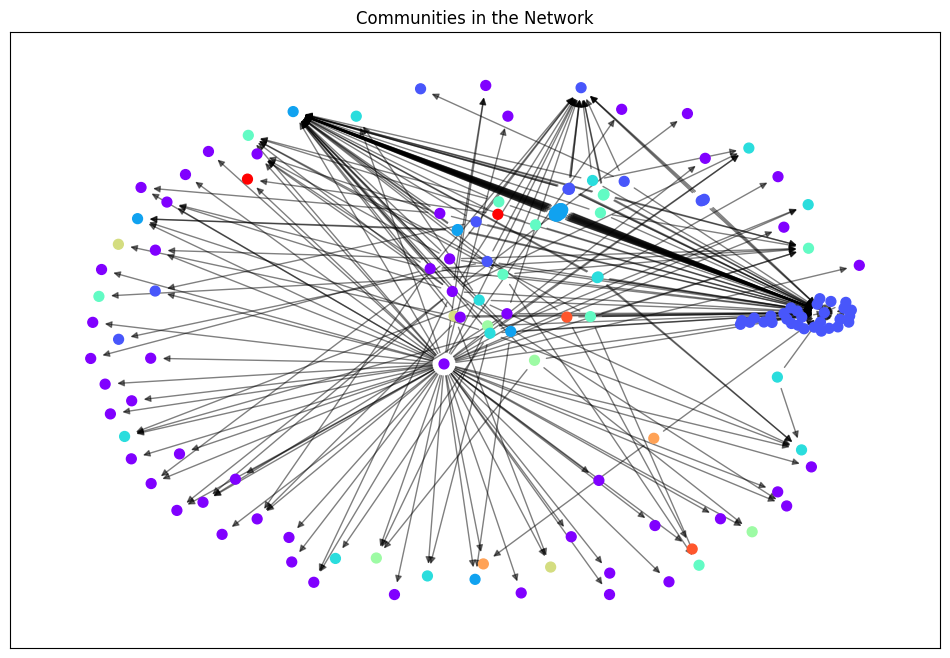

In [32]:
# visualizing communities
# assign colors to communities
community_colors = [node_community_map[node] for node in G.nodes]

# draw e network with nodes colored by community
pos = nx.spring_layout(G) 
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=community_colors, cmap=plt.cm.rainbow, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities in the Network")
plt.show()

In [33]:
# community influence
# community centrality - most influential nodes
df['centrality'] = df['user_id_pseudo'].map(degree_centrality)
community_centrality = df.groupby('community')['centrality'].mean()
print('average centrality per community:', community_centrality)

average centrality per community: community
0    0.290526
1    0.013306
2    0.013920
3    0.040806
4    0.025492
5    0.021429
6    0.025000
7    0.012500
8    0.018750
9    0.018750
Name: centrality, dtype: float64


community_topic_counts: contains number of posts for each (community, topic_id) pair

percentage: percentage of posts in each topic for every community

topic_similarity_matrix: shows percentage of posts per topic for each community

In [34]:
# topic similarity
# group by communtiy and topic, and count posts per community per topic
community_topic_counts = df.groupby(['community', 'topic_id']).size().reset_index(name='post_count')

# normalize to see the percentage of posts in each topic for every community
total_posts_per_community = df.groupby('community').size().reset_index(name='total_posts')

# merge with the topic count data
community_topic_counts = community_topic_counts.merge(total_posts_per_community, on='community')
community_topic_counts['percentage'] = (community_topic_counts['post_count'] / 
                                        community_topic_counts['total_posts']) * 100

# pivot table for better visualization
topic_similarity_matrix = community_topic_counts.pivot(index='community', columns='topic_id', values='percentage').fillna(0)

In [35]:
topic_similarity_matrix

topic_id,1,7,13,14,15,16,17,18,19,20,...,647,649,651,652,655,659,664,672,675,677
community,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.825309,0.275103,0.137552,0.137552,0.137552,0.137552,0.137552,0.137552,...,0.412655,0.137552,0.275103,0.275103,0.275103,0.275103,0.137552,0.275103,0.275103,0.137552
1,0.806452,0.806452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.612903,0.000000,1.612903,1.612903,0.000000,1.612903
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.272727,0.000000,1.515152,0.757576,0.000000,0.757576,0.000000,0.000000,2.272727,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,1.123596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.250000,0.000000,0.000000,0.000000,0.000000,6.250000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


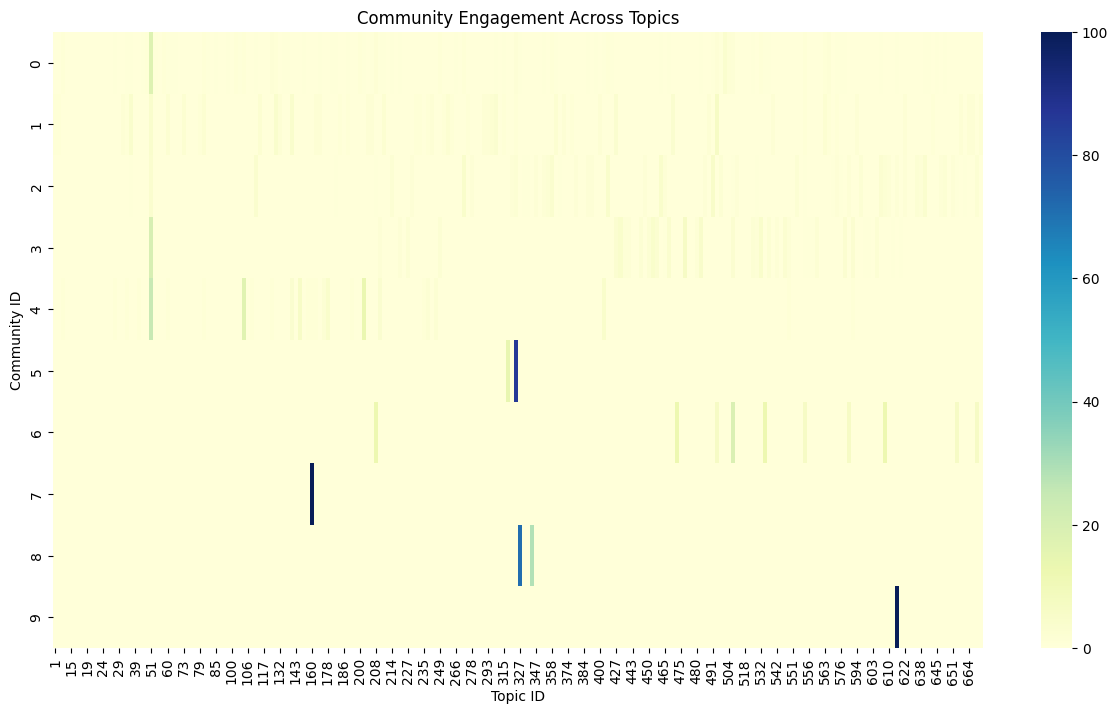

In [36]:
# heatmap to visualize community-topic interactions
plt.figure(figsize=(15, 8))
sns.heatmap(topic_similarity_matrix, cmap="YlGnBu", annot=False)
plt.title("Community Engagement Across Topics")
plt.xlabel("Topic ID")
plt.ylabel("Community ID")
plt.show()

# darker shades = communities that have high engagement in certain topics
# if some communities are highly specialized = focus on a few specific topics
# others might participate broadly across many topcis